In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

results_folder = '../ACO/results/'

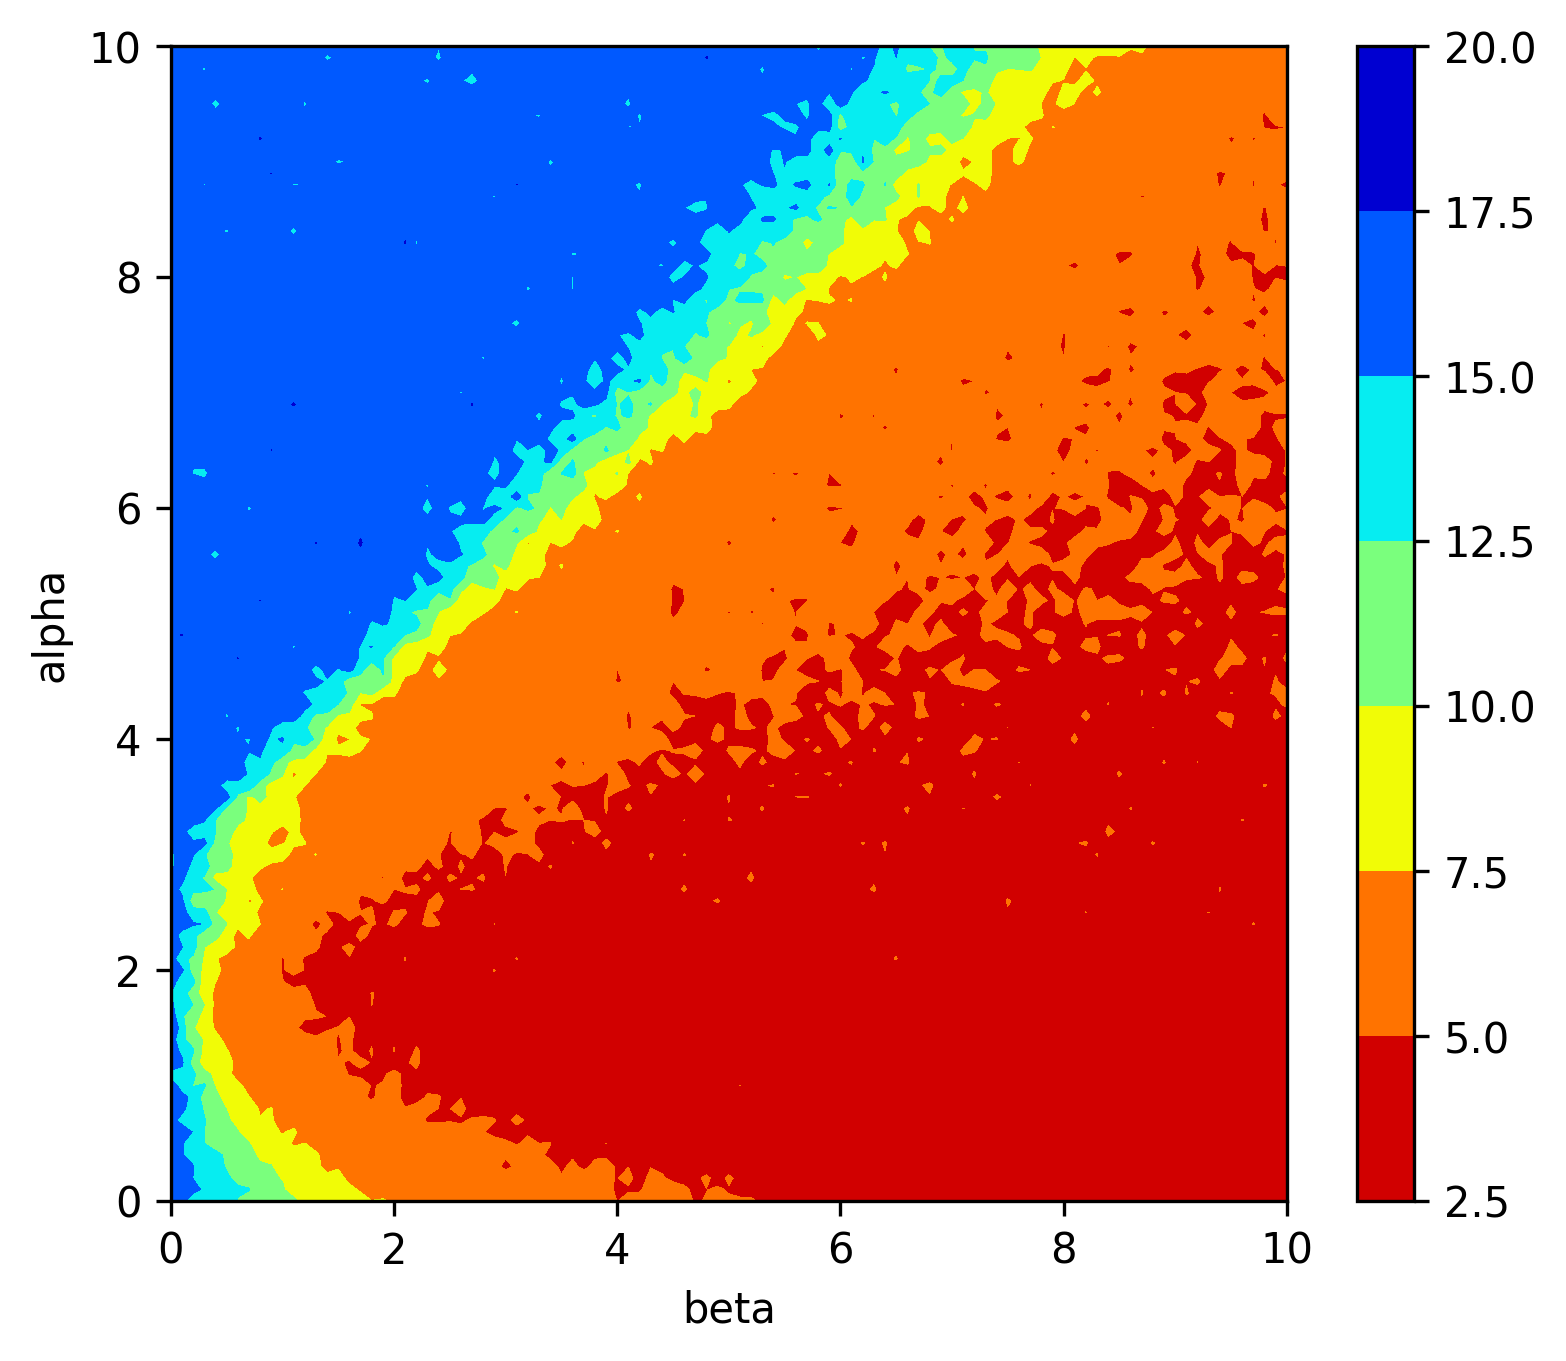

In [2]:
fig, axs = plt.subplots(1, 1, dpi = 300,  figsize=(6, 5))
cmap = 'jet_r'
levels = 5
df = pd.read_csv(results_folder + 'normal_att48_alpha_beta.csv')
df = df[df['iteration']==10]
df = df.groupby(['alpha','beta']).mean().reset_index()
matrix = df.pivot(index='alpha', columns='beta', values='bestLength')
X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
#axs.set_title('Att48 - best length')
axs.set_xlabel('beta')
axs.set_ylabel('alpha')
cs = axs.contourf(X,Y,Z, 5, cmap=cmap)
plt.colorbar(cs, ax=axs)
plt.savefig('images/normal_att48_alpha_beta.png')
plt.show()

In [3]:
df = pd.read_csv(results_folder + 'normal_att48_alpha_beta.csv')
df5 = df[df['iteration']==5]
df5 = df5.groupby(['alpha','beta']).mean().reset_index()

df10 = df[df['iteration']==10]
df10 = df10.groupby(['alpha','beta']).mean().reset_index()

df50 = df[df['iteration']==50]
df50 = df50.groupby(['alpha','beta']).mean().reset_index()

matrix5 = df5.pivot(index='alpha', columns='beta', values='bestLength')
matrix10 = df10.pivot(index='alpha', columns='beta', values='bestLength')
matrix50 = df50.pivot(index='alpha', columns='beta', values='bestLength')

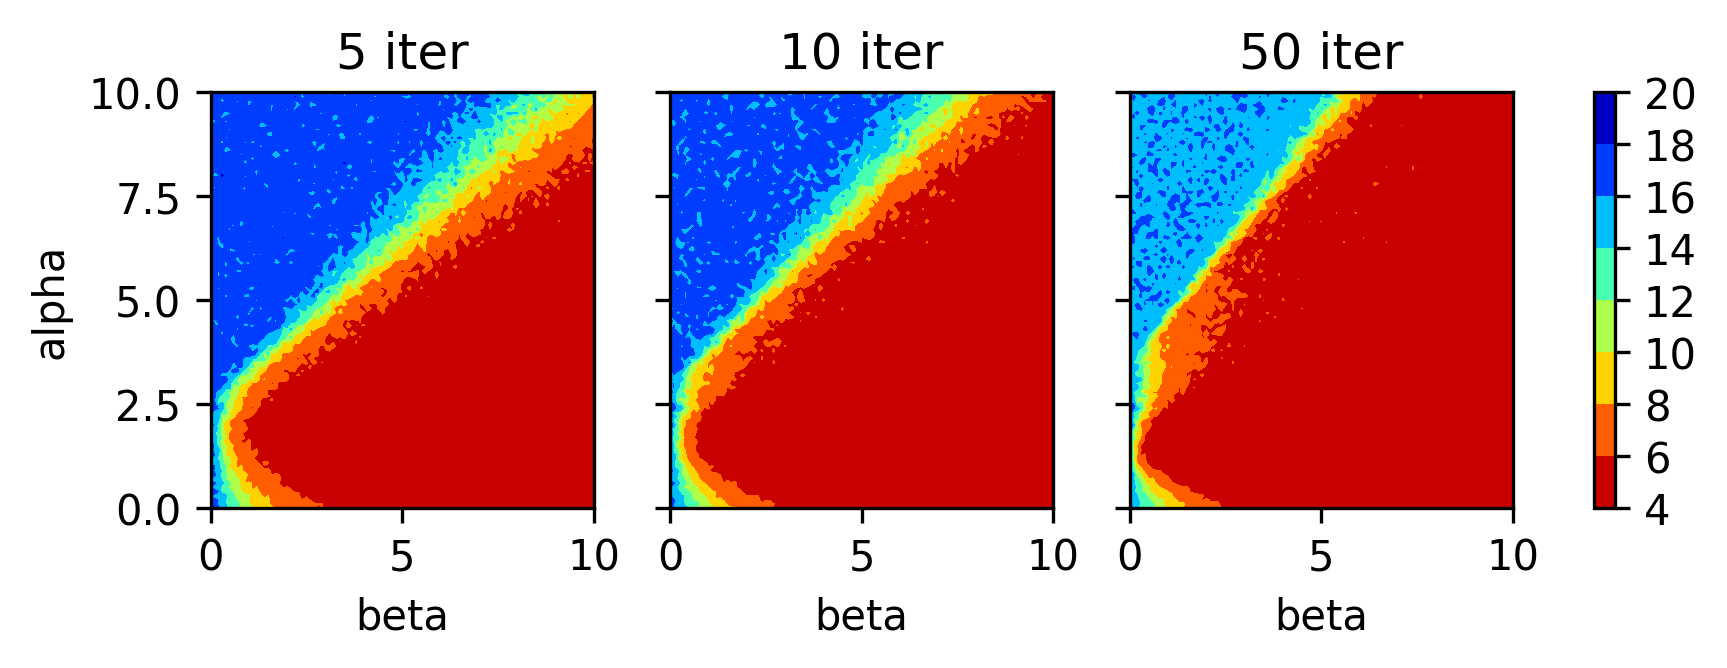

In [4]:
fig, axs = plt.subplots(1, 3, dpi = 300,  figsize=(7, 1.8), sharey=True)
cmap = 'jet_r'
levels = 7

X5 = matrix5.columns.values
Y5 = matrix5.index.values
Z5 = matrix5.values

X10 = matrix10.columns.values
Y10 = matrix10.index.values
Z10 = matrix10.values

X50 = matrix50.columns.values
Y50 = matrix50.index.values
Z50 = matrix50.values

#axs.set_title('Att48 - best length')
axs[0].set_xlabel('beta')
axs[0].set_ylabel('alpha')
cs = axs[0].contourf(X5,Y5,Z5, levels, cmap=cmap)
axs[0].set_title('5 iter')

axs[1].set_xlabel('beta')
cs = axs[1].contourf(X10,Y10,Z10, cs.levels, cmap=cmap)
axs[1].set_title('10 iter')

axs[2].set_xlabel('beta')
cs = axs[2].contourf(X50,Y50,Z50, cs.levels, cmap=cmap)
axs[2].set_title('50 iter')

plt.colorbar(cs, ax=axs)

plt.savefig('images/normal_att48_alpha_beta_iters.png')
plt.show()

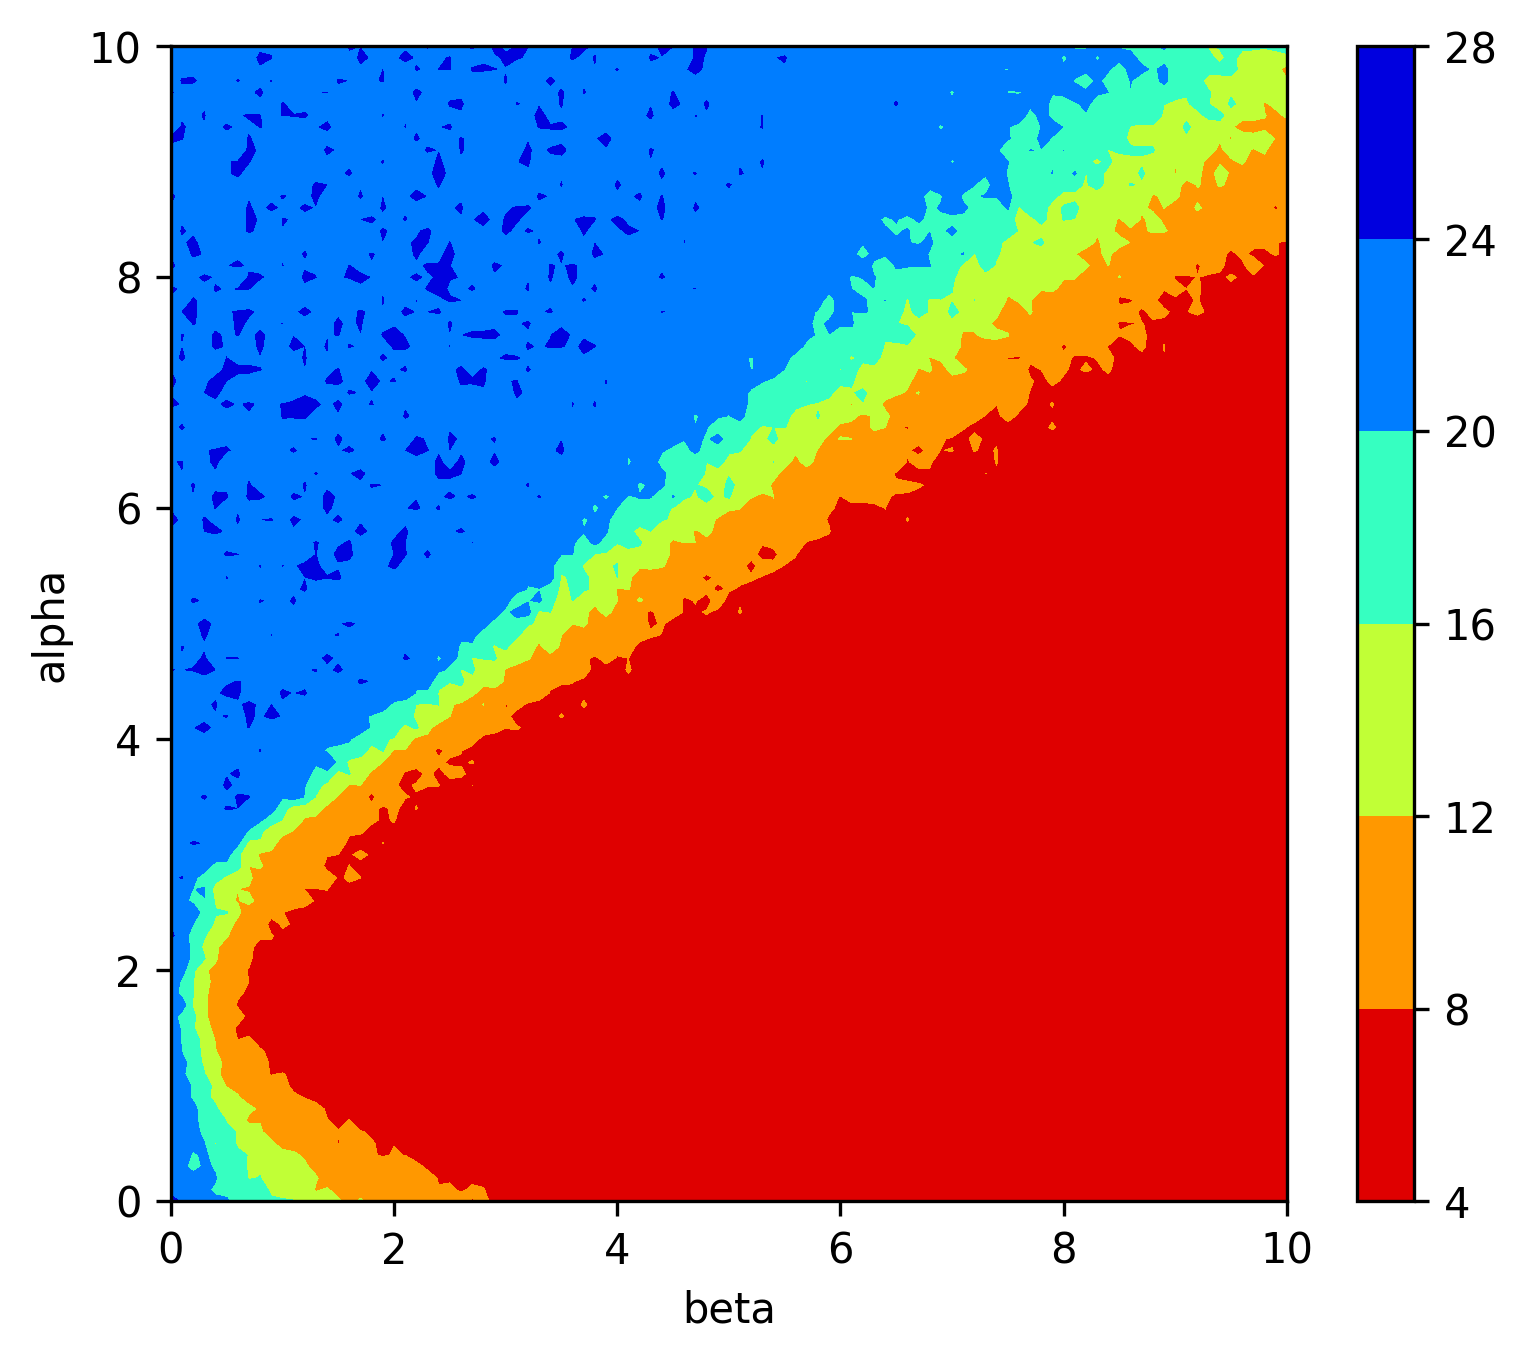

In [5]:
fig, axs = plt.subplots(1, 1, dpi = 300,  figsize=(6, 5))
cmap = 'jet_r'
df = pd.read_csv(results_folder + 'normal_random50_alpha_beta.csv')
df = df[df['iteration']==10]
df = df.groupby(['alpha','beta']).mean().reset_index()
matrix = df.pivot(index='alpha', columns='beta', values='bestLength')
X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
axs.set_xlabel('beta')
axs.set_ylabel('alpha')
cs = axs.contourf(X,Y,Z, levels = 5, cmap=cmap)
plt.colorbar(cs, ax=axs)
plt.savefig('images/normal_random50_alpha_beta.png')
plt.show()

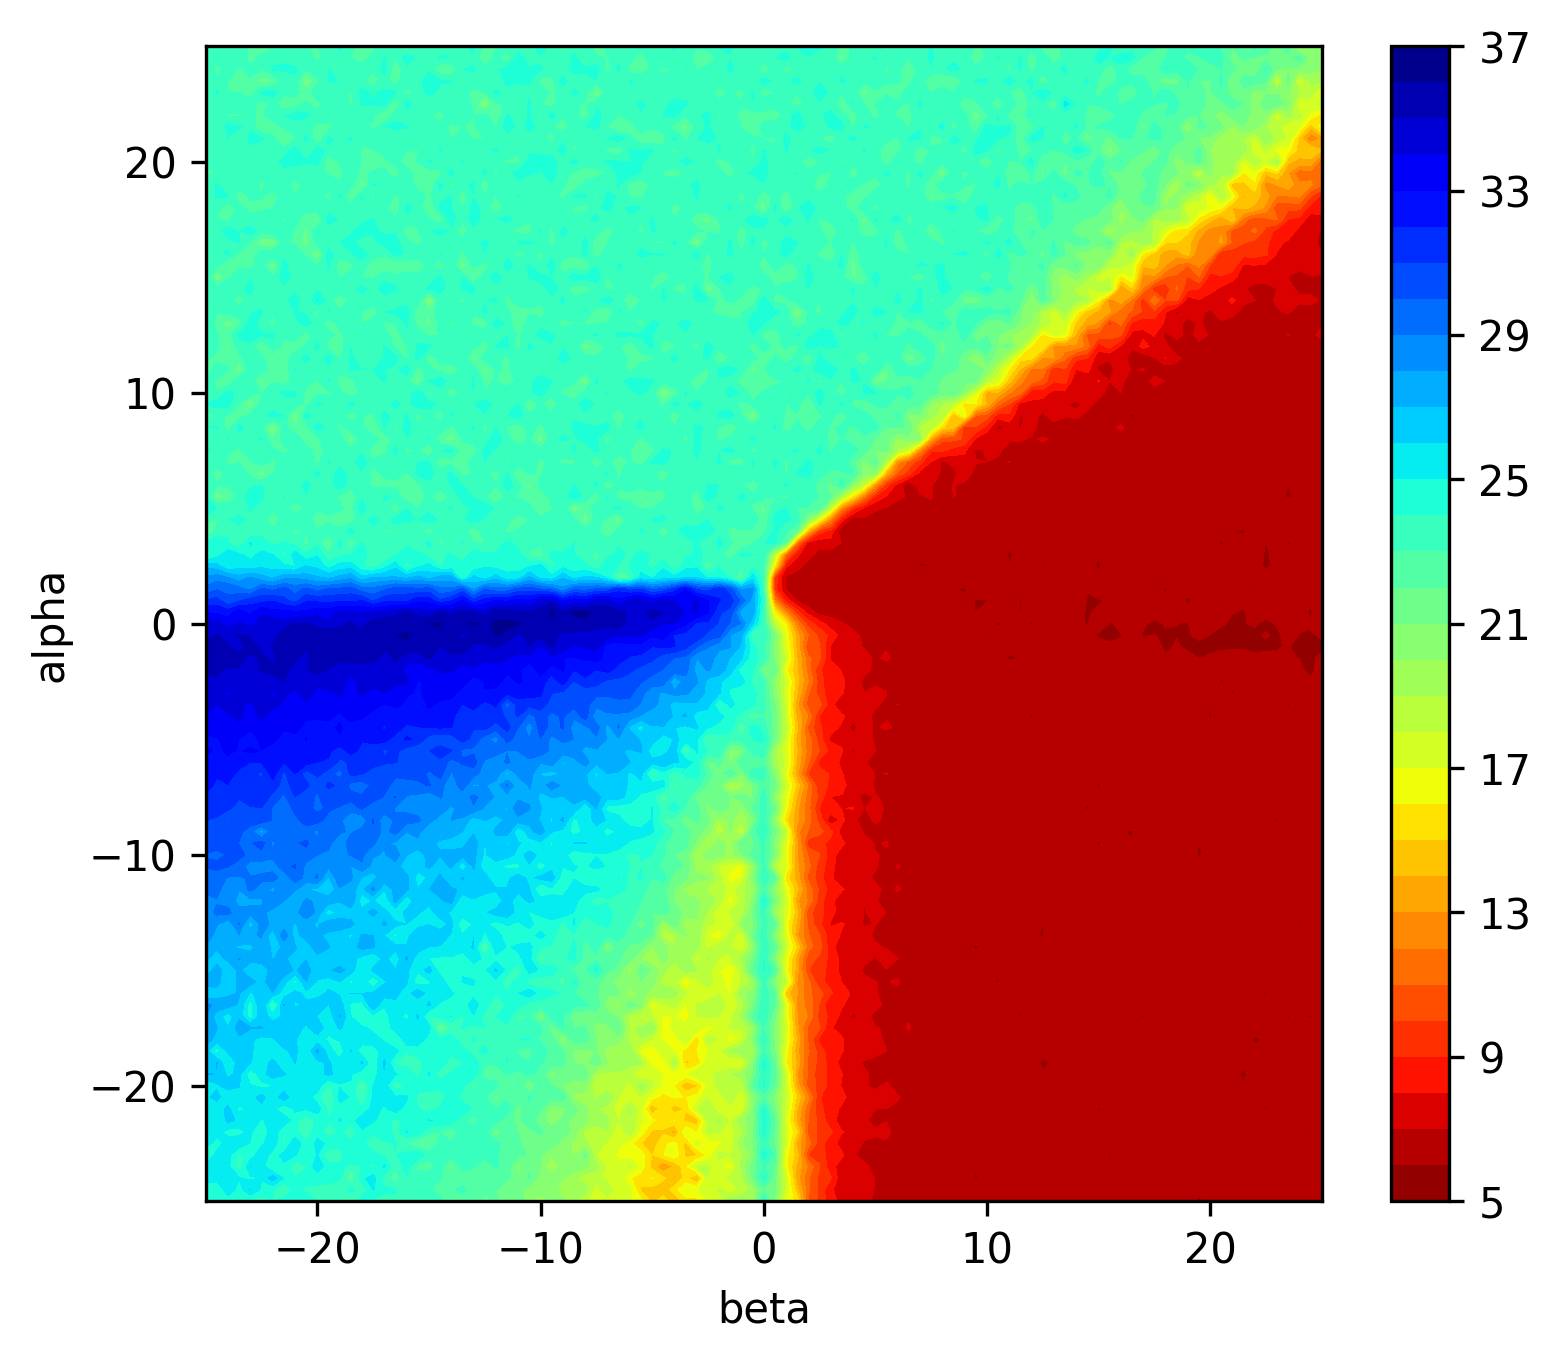

In [6]:
fig, axs = plt.subplots(1, 1, dpi = 300,  figsize=(6, 5))
cmap = 'jet_r'
levels = 30
df = pd.read_csv(results_folder+'normal_random50_alpha_beta_negative.csv')
df = df[df['iteration']==10]
df = df.groupby(['alpha','beta']).mean().reset_index()
matrix = df.pivot(index='alpha', columns='beta', values='bestLength')
X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
#axs.set_title('50 random cities - best length')
axs.set_xlabel('beta')
axs.set_ylabel('alpha')
cs = axs.contourf(X,Y,Z, levels, cmap=cmap)
plt.colorbar(cs, ax=axs)
plt.savefig('images/normal_random50_alpha_beta_negative.png')
plt.show()

In [7]:
def average(df1,pos,step):
    df2 = df1.loc[pos:pos+step]
    return (pos,df2['bestLength'].mean())

def rho_iter_res(step,df):
    alls = []
    for i in range(2,df.iteration.max()+1):
        df1 = df[df['iteration']==i]
        df1 = df1[['rho','bestLength']]
        df1 = df1.set_index('rho')
        l = []
        pos = 0
        while pos + step <= 1:
            pos += 0.01
            l.append(average(df1,pos,step))
        alls.append(min(l, key = lambda t: t[1])[0])
    return alls

In [8]:
raw = pd.read_csv(results_folder + 'normal_random1000_rho.csv')
d1 = raw[raw['iteration']==5]
d1.sort_values(by=['rho'], inplace=True)
d2 = raw[raw['iteration']==10]
d2.sort_values(by=['rho'], inplace=True)
d3 = raw[raw['iteration']==25]
d3.sort_values(by=['rho'], inplace=True)
d4 = raw[raw['iteration']==100]
d4.sort_values(by=['rho'], inplace=True)

d = pd.concat([d1,d2,d3,d4])
d = d.groupby(['rho','bestLength']).mean().reset_index()


/tmp/ipykernel_317090/1114043110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1.sort_values(by=['rho'], inplace=True)
/tmp/ipykernel_317090/1114043110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2.sort_values(by=['rho'], inplace=True)
/tmp/ipykernel_317090/1114043110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3.sort_values(by=['rho'], inplace=True)
/tmp/ipykernel_317090/1114043110.py:9: SettingWithCopyWarning

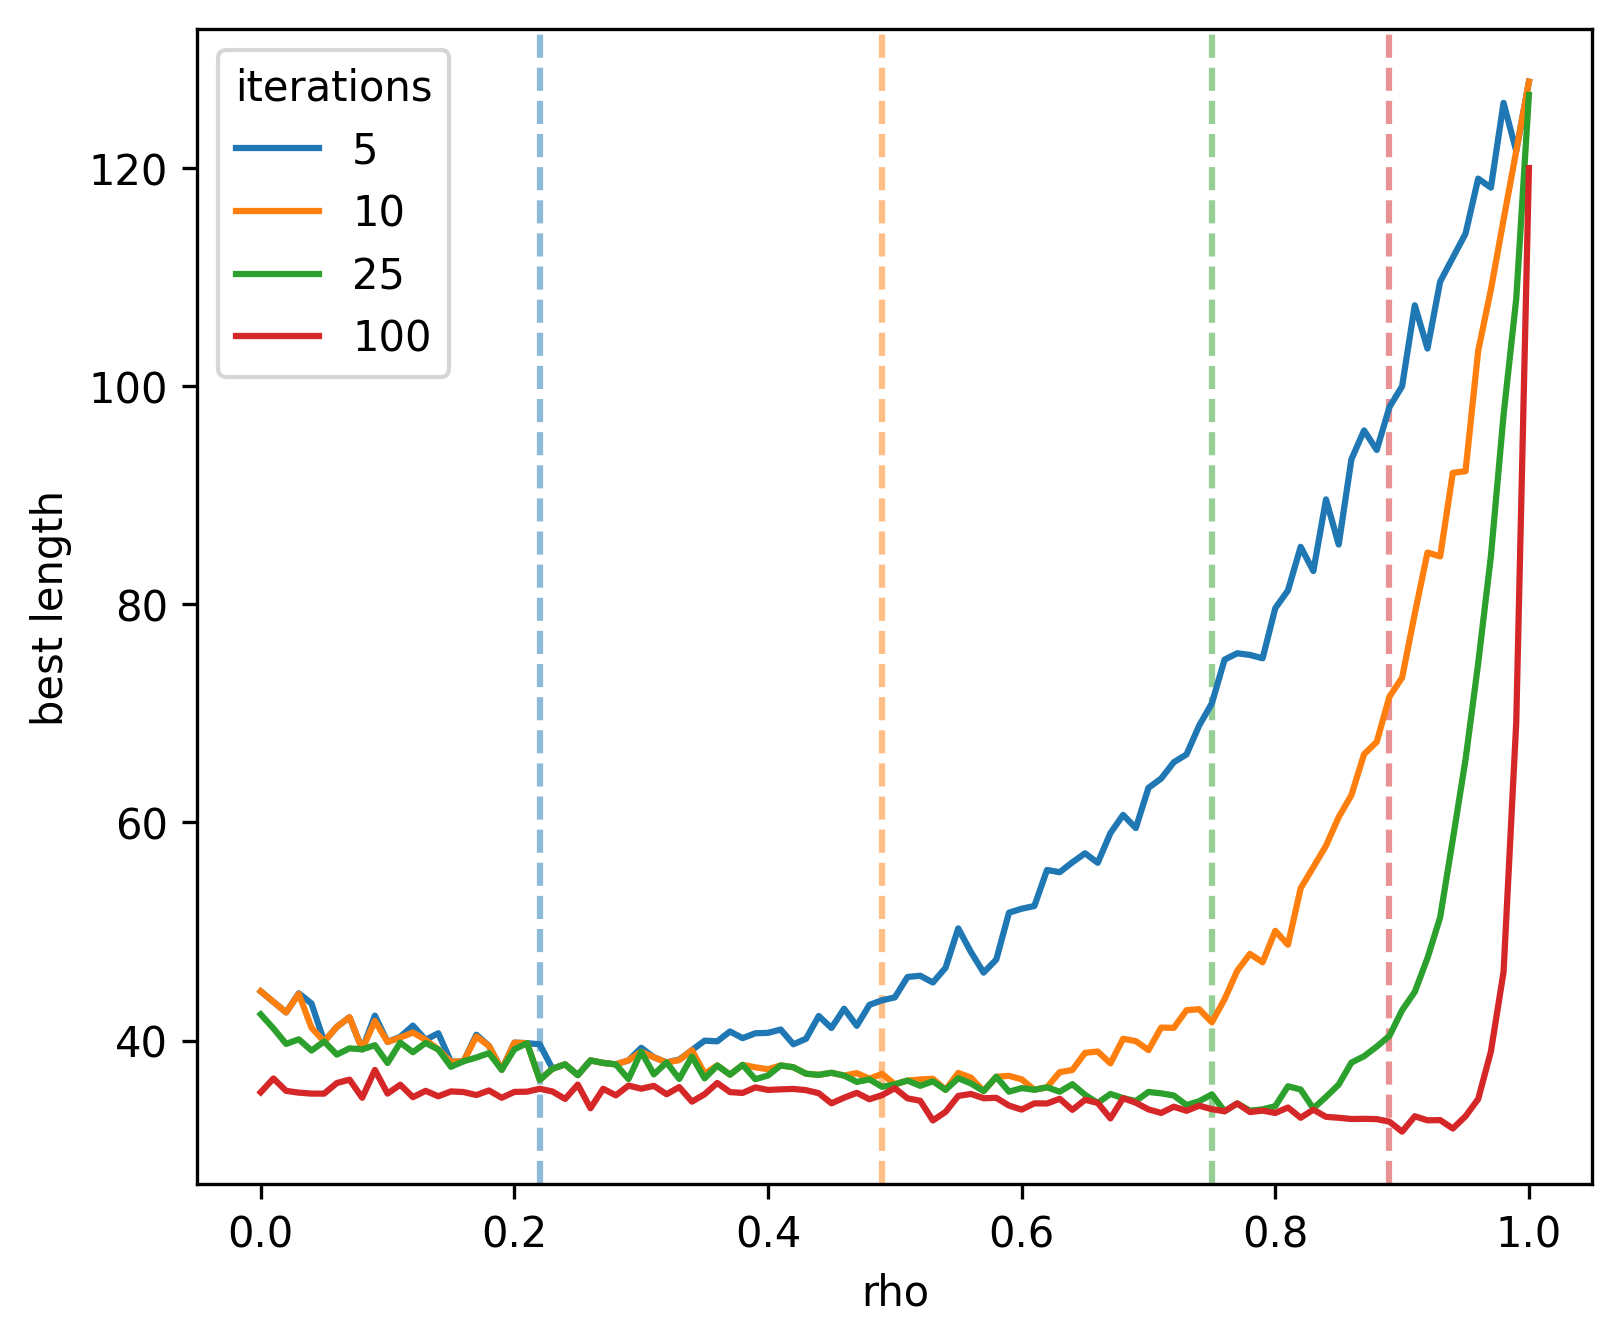

In [9]:
fig, axs = plt.subplots(1, 1,  figsize=(6, 5),dpi=300)

plt.axvline(x=rho_iter_res(0.05,d1)[-1], color='tab:blue', linestyle='--', alpha=0.5)
plt.axvline(x=rho_iter_res(0.05,d2)[-1], color='tab:orange', linestyle='--', alpha=0.5)
plt.axvline(x=rho_iter_res(0.05,d3)[-1], color='tab:green', linestyle='--', alpha=0.5)
plt.axvline(x=rho_iter_res(0.05,d4)[-1], color='tab:red', linestyle='--',   alpha=0.5)

plt.plot(d1['rho'],d1['bestLength'],label='5', color='tab:blue')
plt.plot(d2['rho'],d2['bestLength'],label='10', color='tab:orange')
plt.plot(d3['rho'],d3['bestLength'],label='25', color='tab:green')
plt.plot(d4['rho'],d4['bestLength'],label='100', color='tab:red')

plt.xlabel('rho')
plt.ylabel('best length')
plt.legend(title = 'iterations')
plt.savefig('images/normal_random1000_rho_4_lines.png',dpi=300)
plt.show()

[ 0.94811916 -6.35729281  4.35609945]
f(x) = 0.9481191639924865 + -6.357292807370681/(x + 4.356099450104196)


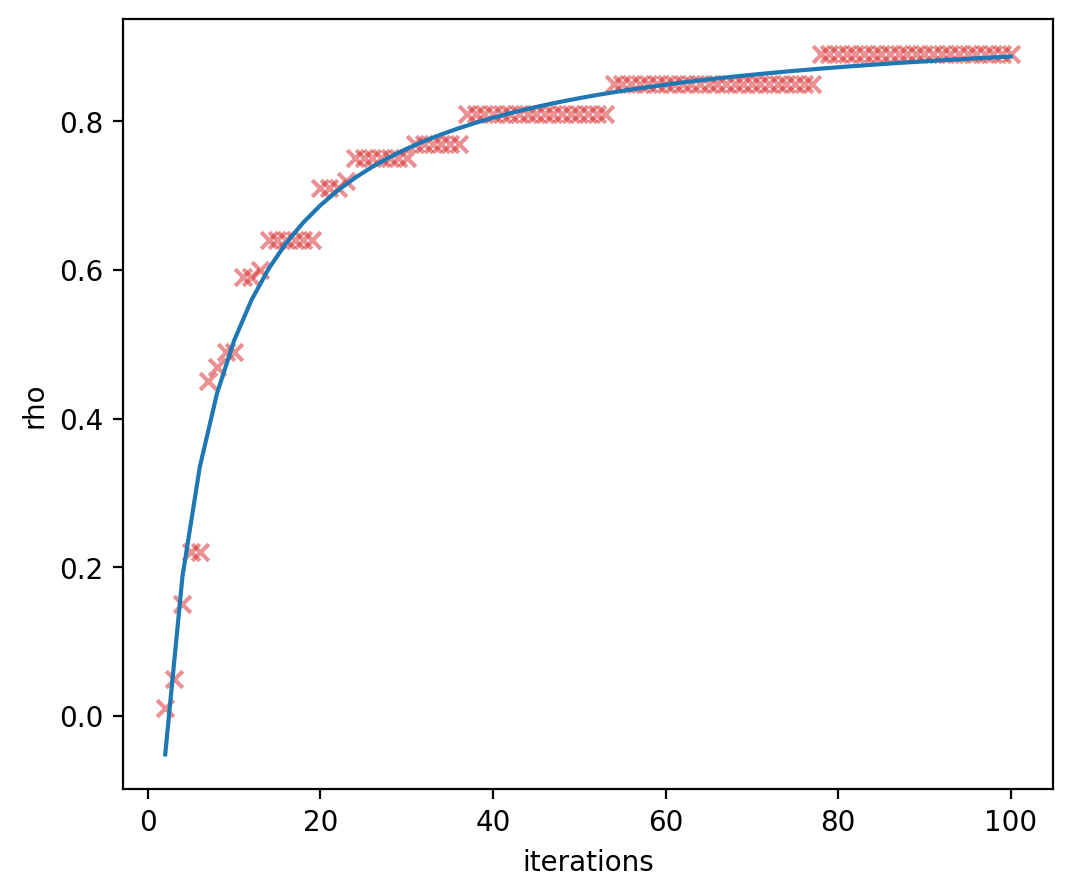

In [10]:
from scipy.optimize import curve_fit

fig, axs = plt.subplots(1, 1,  figsize=(6, 5),dpi=200)

raw = pd.read_csv(results_folder+'normal_random1000_rho.csv')
df = raw.groupby(['rho','iteration']).mean().reset_index()

y = rho_iter_res(0.05,df)
x = list(range(2,101))

def inverseF(x, a, b, c):
    y = a + b/(x + c)
    return y

parameters, covariance = curve_fit(inverseF, x, y)

print(parameters)

# calculate new x's and y'
x_new = np.linspace(x[0], x[-1], 50)
y_new = inverseF(x_new, *parameters) 

# print funtion filled
print("f(x) = " + str(parameters[0]) + " + " + str(parameters[1]) + "/(x + " + str(parameters[2]) + ")")

plt.xlabel('iterations')
plt.ylabel('rho')
plt.scatter(x, y, marker='x', color='tab:red', alpha=0.5)
plt.plot(x_new, y_new, color='tab:blue')
plt.savefig('images/normal_random1000_rho.png',dpi=300)
plt.show()



[35, 29, 42, 16, 26, 18, 36, 5, 27, 6, 17, 43, 30, 37, 7, 0, 8, 39, 14, 11, 10, 12, 24, 13, 22, 2, 21, 15, 40, 33, 47, 4, 28, 1, 41, 25, 3, 34, 44, 9, 23, 31, 38, 20, 46, 19, 32, 45]
4.318952471607378
4.369632007265804


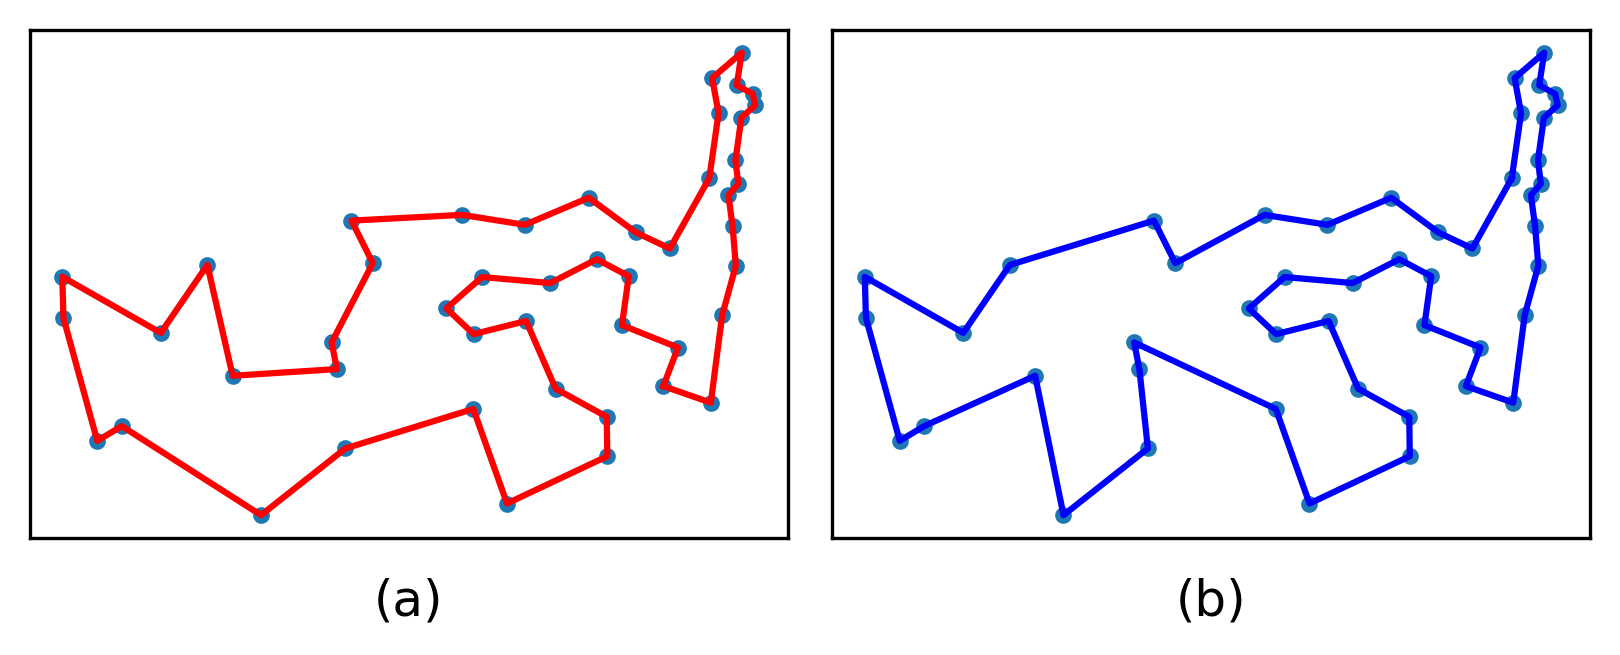

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# read points from normal_att48.txt and plot on matplotlib
fig, axs = plt.subplots(1, 2, figsize=(5.5, 2.3), dpi=300, sharey=True)

points = np.loadtxt('../ACO/maps/normal_att48.txt', delimiter=',', dtype=float)
x = [points[i][0] for i in range(len(points))]
y = [points[i][1] for i in range(len(points))]
coords = list(zip(x, y))

optimal = [1,8,38,31,44,18,7,28,6,37,19,27,17,43,30,36,46,33,20,47,21,32,39,48,5,42,24,10,45,35,4,26,2,29,34,41,16,22,3,23,14,25,13,11,12,15,40,9]
optimal = [i-1 for i in optimal]

optimal_x = [x[i] for i in optimal] + [x[0]]
optimal_y = [y[i] for i in optimal] + [y[0]]

df = pd.read_csv('../ACO/results/nortmal_att48_sample_paths.csv')


def parsePath(pathStr):
    removeBrackets = pathStr[1:-1]
    split = removeBrackets.split('-')
    return [int(x) for x in split]

last = df.loc[100000]['bestPath']
parsedPath = parsePath(last)
print(parsedPath)
suboptimal_x = [x[i] for i in parsedPath] + [x[parsedPath[0]]]
suboptimal_y = [y[i] for i in parsedPath] + [y[parsedPath[0]]]



axs[0].plot(optimal_x, optimal_y, color='red', linestyle="-", alpha=1)
axs[1].plot(suboptimal_x, suboptimal_y, color='blue', linestyle="-", alpha=1)
axs[0].scatter(x, y, marker='.')
axs[1].scatter(x, y, marker='.')


# hide ticks 
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].set_xticks([])
axs[1].set_yticks([])


# title under plot
axs[0].set_title('(a)', y=-0.2)
axs[1].set_title('(b)', y=-0.2)

# plot optimal path
axs[0].axis('equal')
axs[1].axis('equal')


# use np
def len_of_path(path):
    length = 0
    for i in range(len(path)-1):
        length += np.linalg.norm(np.array([x[path[i]], y[path[i]]]) - np.array([x[path[i+1]], y[path[i+1]]]))
    length += np.linalg.norm(np.array([x[path[-1]], y[path[-1]]]) - np.array([x[path[0]], y[path[0]]]))
    return length

print(len_of_path(optimal))
print(len_of_path(parsedPath))

plt.tight_layout()

plt.savefig('images/att48.png', dpi=300)

plt.show()

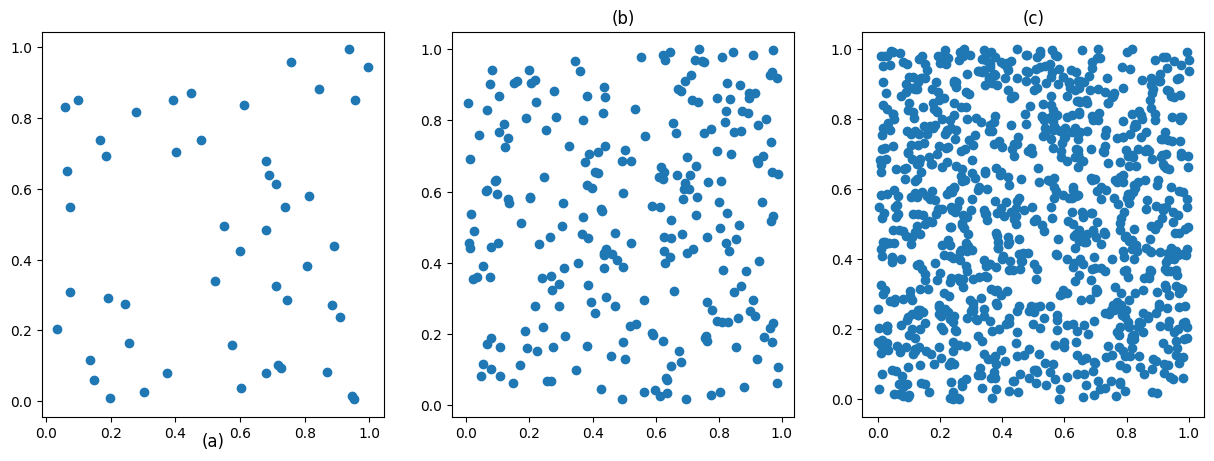

In [12]:
# plot in 3 axes, from files random50_normal.txt, random250_normal.txt, random1000_normal.txt

points1 = np.loadtxt('../ACO/maps/normal_random50.txt', delimiter=',', dtype=float)
points2 = np.loadtxt('../ACO/maps/normal_random250.txt', delimiter=',', dtype=float)
points3 = np.loadtxt('../ACO/maps/normal_random1000.txt', delimiter=',', dtype=float)

x1 = [points1[i][0] for i in range(len(points1))]
y1 = [points1[i][1] for i in range(len(points1))]
coords1 = list(zip(x1, y1))

x2 = [points2[i][0] for i in range(len(points2))]
y2 = [points2[i][1] for i in range(len(points2))]
coords2 = list(zip(x2, y2))

x3 = [points3[i][0] for i in range(len(points3))]
y3 = [points3[i][1] for i in range(len(points3))]
coords3 = list(zip(x3, y3))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(x1, y1)
axs[1].scatter(x2, y2)
axs[2].scatter(x3, y3)

axs[0].set_title('(a)', y=-0.1)
axs[1].set_title('(b)')
axs[2].set_title('(c)')

plt.savefig('images/normal_random_maps.png', dpi=300)
plt.show()

/tmp/ipykernel_317090/3633199136.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['alpha','beta']).mean().reset_index()


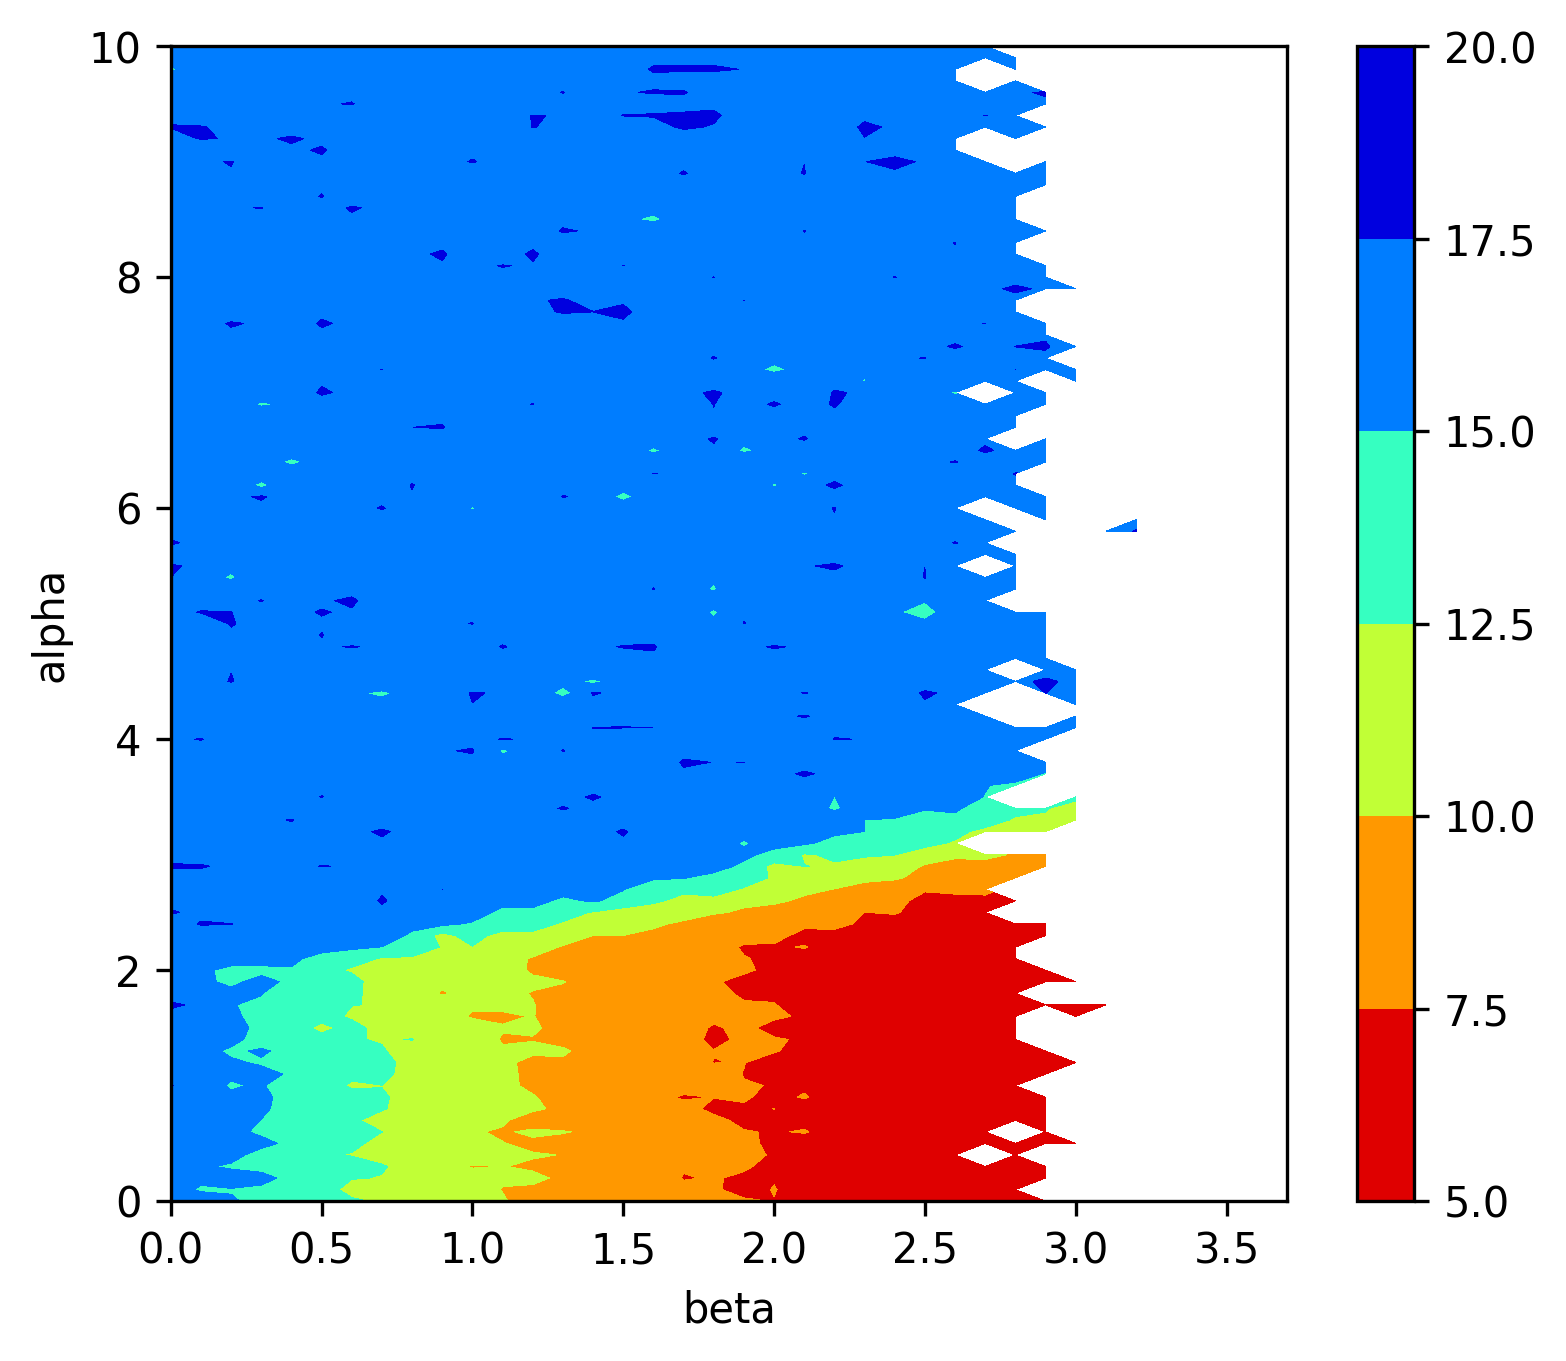

In [ ]:
fig, axs = plt.subplots(1, 1, dpi = 300,  figsize=(6, 5))
cmap = 'jet_r'
levels = 5
df = pd.read_csv(results_folder + 'deceptive1.csv')
df = df[df['iteration']==5]
df = df.groupby(['alpha','beta']).mean().reset_index()
matrix = df.pivot(index='alpha', columns='beta', values='bestLength')
X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
#axs.set_title('Att48 - best length')
axs.set_xlabel('beta')
axs.set_ylabel('alpha')
cs = axs.contourf(X,Y,Z, 5, cmap=cmap)
plt.colorbar(cs, ax=axs)
plt.savefig('images/aaa.png')
plt.show()